<a href="https://colab.research.google.com/github/nagapurisatwika/Stock-price-prediction-LSTM/blob/main/Stock_price_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
# STEP 2: LOAD STOCK DATA
data = yf.download('AAPL', start='2015-01-01', end='2024-01-01')
data = data[['Close']]  # Only use the 'Close' price


/tmp/ipython-input-2-1088628900.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


In [3]:
# STEP 3: NORMALIZE DATA
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [4]:
# STEP 4: CREATE SEQUENCES
X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [5]:
# STEP 5: BUILD LSTM MODEL
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# STEP 6: COMPILE AND TRAIN MODEL
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0346
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 7.0903e-04
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.8993e-04
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 6.4869e-04
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 6.0698e-04
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 5.9719e-04
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.9210e-04
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 4.8186e-04
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 5.9007e-04
Epoch 10/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.7654e-04


In [7]:
# STEP 7: MAKE PREDICTIONS
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


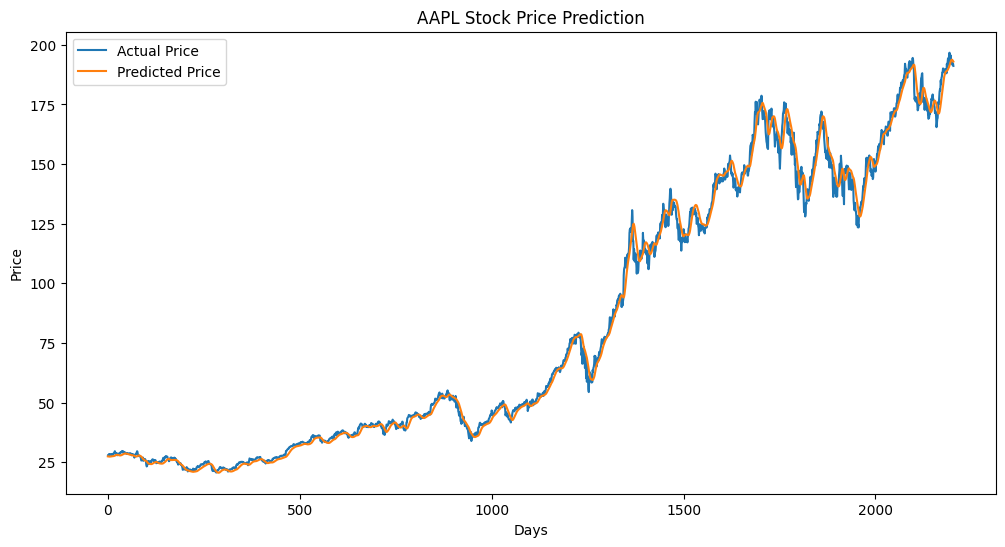

In [9]:
# STEP 8: PLOT THE RESULTS
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
